In [ ]:
# import library

import tensorflow as tf
import pandas as pd
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt
import os
import pathlib
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#connect to dataset folder
path = '/content/drive/MyDrive/Mias Mammography Database/all-mias'
data_dir = pathlib.Path(path)

In [ ]:
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['Info.txt', 'Licence.txt', 'README', 'infonew.txt', 'mdb001.pgm',
       'mdb002.pgm', 'mdb003.pgm', 'mdb004.pgm', 'mdb005.pgm',
       'mdb006.pgm', 'mdb007.pgm', 'mdb008.pgm', 'mdb009.pgm',
       'mdb010.pgm', 'mdb011.pgm', 'mdb012.pgm', 'mdb013.pgm',
       'mdb014.pgm', 'mdb015.pgm', 'mdb016.pgm', 'mdb017.pgm',
       'mdb018.pgm', 'mdb019.pgm', 'mdb020.pgm', 'mdb021.pgm',
       'mdb022.pgm', 'mdb023.pgm', 'mdb024.pgm', 'mdb025.pgm',
       'mdb026.pgm', 'mdb027.pgm', 'mdb028.pgm', 'mdb029.pgm',
       'mdb030.pgm', 'mdb031.pgm', 'mdb032.pgm', 'mdb033.pgm',
       'mdb034.pgm', 'mdb035.pgm', 'mdb036.pgm', 'mdb037.pgm',
       'mdb038.pgm', 'mdb039.pgm', 'mdb040.pgm', 'mdb041.pgm',
       'mdb042.pgm', 'mdb043.pgm', 'mdb044.pgm', 'mdb045.pgm',
       'mdb046.pgm', 'mdb047.pgm', 'mdb048.pgm', 'mdb049.pgm',
       'mdb050.pgm', 'mdb051.pgm', 'mdb052.pgm', 'mdb053.pgm',
       'mdb054.pgm', 'mdb055.pgm', 'mdb056.pgm', 'mdb057.pgm',
       'mdb058.pgm', 'mdb059.pgm', 'mdb060.pg

In [ ]:
!pip install colorama

In [ ]:

import numpy as np
import pandas as pd
import cv2
from PIL import Image
import scipy

import tensorflow as tf
from tensorflow.keras.applications import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.preprocessing.image import *
from tensorflow.keras.utils import *
# import pydot

from sklearn.metrics import *
from sklearn.model_selection import *
import tensorflow.keras.backend as K

from tqdm import tqdm, tqdm_notebook
from colorama import Fore
import json
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from skimage.io import *
%config Completer.use_jedi = False
import time
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import lightgbm as lgb
import xgboost as xgb

print("All modules have been imported")

All modules have been imported


In [ ]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Define file path
file_path = '/content/drive/MyDrive/Mias Mammography Database/Info.txt'

# Read the data
info = pd.read_csv(file_path, sep='\s+', engine='python', on_bad_lines='skip')

# Check if 'Unnamed: 7' column exists and drop it
if 'Unnamed: 7' in info.columns:
    info = info.drop('Unnamed: 7', axis=1)

# Fill missing values in SEVERITY with 0
info['SEVERITY'] = info['SEVERITY'].fillna(0)

# Save the modified DataFrame to 'infonew.txt'
info.to_csv('/content/drive/MyDrive/Mias Mammography Database/all-mias/infonew.txt', sep=' ', index=False)

# Display info after modifications
print(info.head())

# Read the modified file back into a DataFrame
info_new = pd.read_csv('/content/drive/MyDrive/Mias Mammography Database/all-mias/infonew.txt', sep=' ')

# Display the newly read DataFrame to verify
print(info_new.head())

Mounted at /content/drive
   REFNUM BG CLASS SEVERITY      X      Y  RADIUS
0  mdb001  G  CIRC        B  535.0  425.0   197.0
1  mdb002  G  CIRC        B  522.0  280.0    69.0
2  mdb003  D  NORM        0    NaN    NaN     NaN
3  mdb004  D  NORM        0    NaN    NaN     NaN
4  mdb005  F  CIRC        B  477.0  133.0    30.0
   REFNUM BG CLASS SEVERITY      X      Y  RADIUS
0  mdb001  G  CIRC        B  535.0  425.0   197.0
1  mdb002  G  CIRC        B  522.0  280.0    69.0
2  mdb003  D  NORM        0    NaN    NaN     NaN
3  mdb004  D  NORM        0    NaN    NaN     NaN
4  mdb005  F  CIRC        B  477.0  133.0    30.0


<ipython-input-40-64d58e163880>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=info.SEVERITY.value_counts().index,
<ipython-input-40-64d58e163880>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=info.CLASS.value_counts().index,


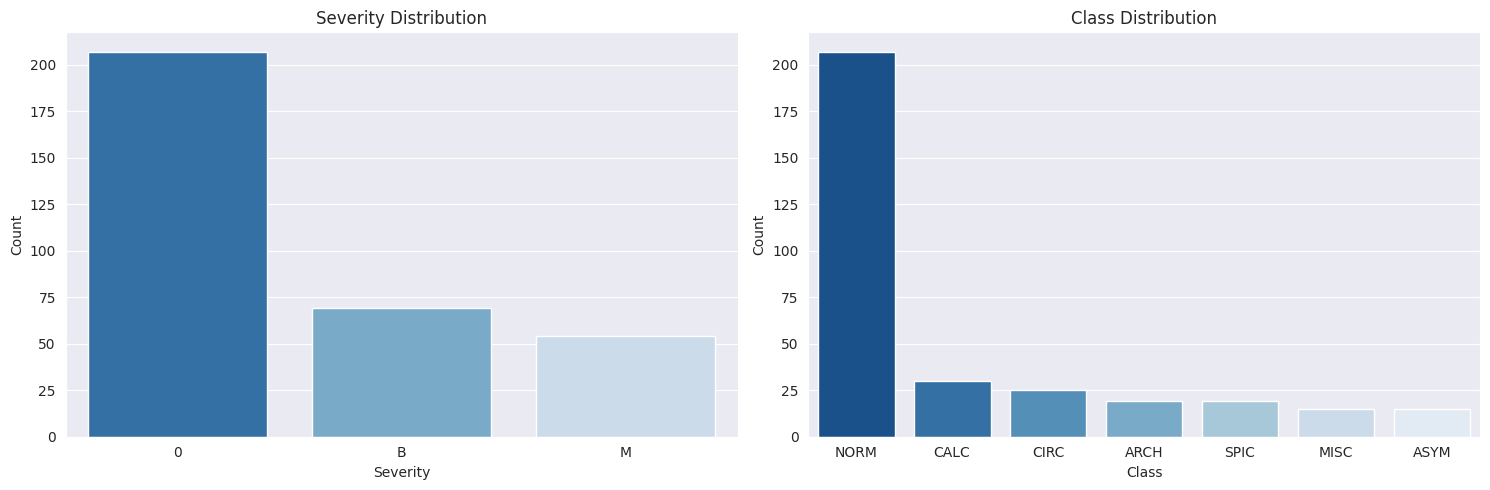

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'info' is your DataFrame
sns.set_style('darkgrid')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot for SEVERITY
sns.barplot(x=info.SEVERITY.value_counts().index,
            y=info.SEVERITY.value_counts().values,
            palette='Blues_r',
            ax=ax1)
ax1.set_title('Severity Distribution')
ax1.set_xlabel('Severity')
ax1.set_ylabel('Count')


# Plot for CLASS
sns.barplot(x=info.CLASS.value_counts().index,
            y=info.CLASS.value_counts().values,
            palette='Blues_r',
            ax=ax2)
ax2.set_title('Class Distribution')
ax2.set_xlabel('Class')
ax2.set_ylabel('Count')

plt.tight_layout()
plt.show()

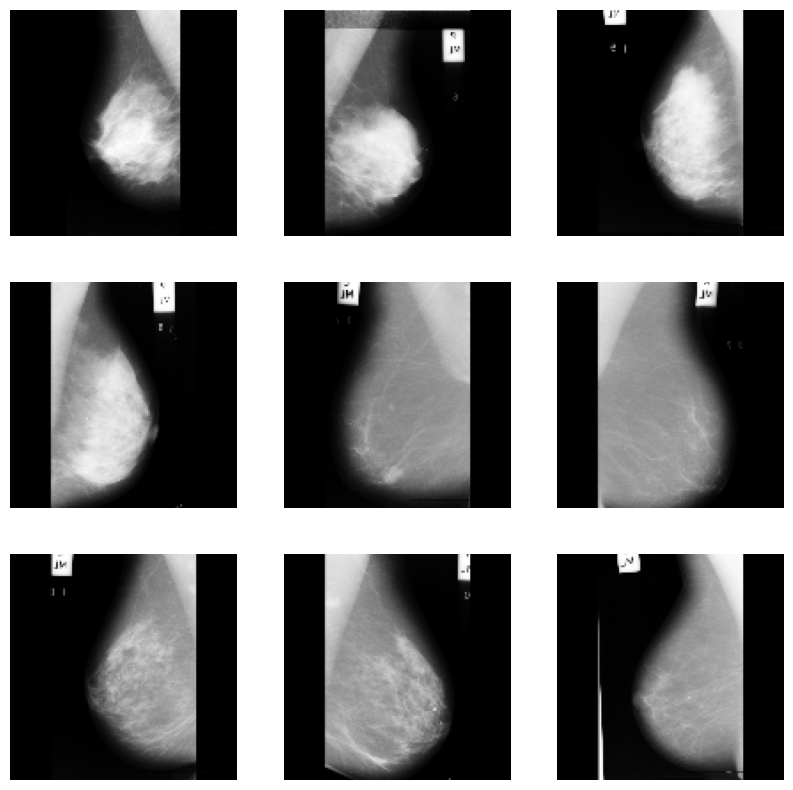

In [ ]:

import glob
import numpy as np
import matplotlib.pyplot as plt
# Load and resize images
x = []
for filename in sorted(glob.glob(os.path.join(data_dir, "*.pgm"))):
    img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)  # Read as grayscale
    img = cv2.resize(img, (128, 128))
    x.append(img)

# Display images in a grid
fig = plt.figure(figsize=(10, 10))
columns = 3
rows = 3

for i in range(1, columns * rows + 1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(x[i - 1], cmap='gray')
    plt.axis('off')

plt.show()

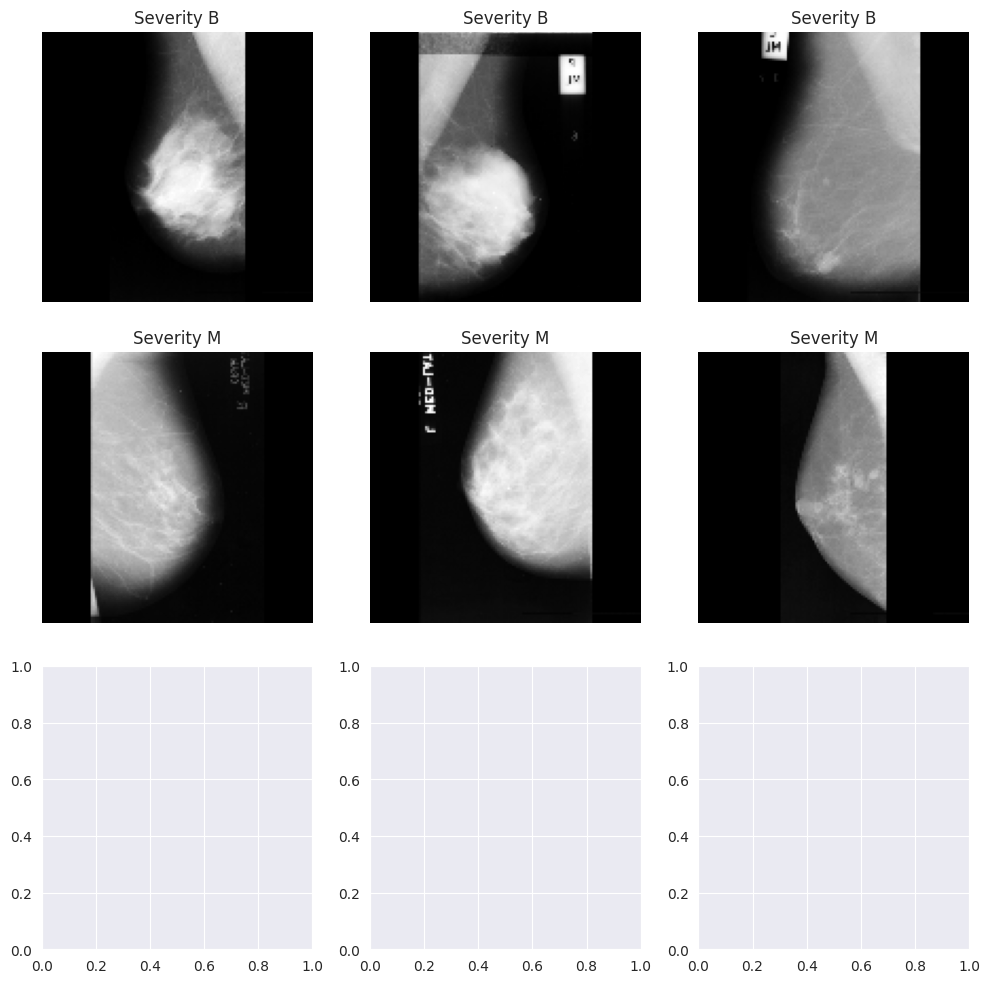

In [ ]:
# prompt: show dataset image 3x3 with severity label B M and O

# Filter images based on severity
b_images = [img for i, img in enumerate(x) if info_new.iloc[i]['SEVERITY'] == 'B']
m_images = [img for i, img in enumerate(x) if info_new.iloc[i]['SEVERITY'] == 'M']

# Display images in a 3x3 grid for each severity
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

# B images
for i in range(3):
    axes[0, i].imshow(b_images[i], cmap='gray')
    axes[0, i].set_title('Severity B')
    axes[0, i].axis('off')

# M images
for i in range(3):
    axes[1, i].imshow(m_images[i], cmap='gray')
    axes[1, i].set_title('Severity M')
    axes[1, i].axis('off')


plt.tight_layout()
plt.show()


In [ ]:
# Image Augmentation
no_angles = 360
url = '/content/drive/MyDrive/Mias Mammography Database/all-mias/'

def save_dictionary(path,data):
        print('saving catalog...')
        #open('u.item', encoding="utf-8")
        import json
        with open(path,'w') as outfile:
            json.dump(str(data), fp=outfile)
        # save to file:
        print(' catalog saved')

In [ ]:
# def read_image():
#         print("Reading images")
#         import cv2
#         info = {}
#         for i in range(322):
#             if i<9:
#                 image_name='mdb00'+str(i+1)
#             elif i<99:
#                 image_name='mdb0'+str(i+1)
#             else:
#                 image_name = 'mdb' + str(i+1)
#             image_address= url+image_name+'.pgm'
#             img = cv2.imread(image_address,1)
#             img = cv2.resize(img, (128,128))
#             rows, cols,channel = img.shape
#             info[image_name]={}
#             for angle in range(0,no_angles,8):
#                 M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
#                 img_rotated = cv2.warpAffine(img, M, (cols, rows))
#                 info[image_name][angle]=img_rotated
#         return (info)


In [ ]:
# def read_lable():
#     print("Reading labels")
#     filename = url+'Info.txt'
#     text_all = open(filename).read()
#     #print(text_all)
#     lines=text_all.split('\n')
#     info={}
#     for line in lines:
#         words=line.split(' ')
#         if len(words)>3:
#             if (words[3] == 'B'):
#                 info[words[0]] = {}
#                 for angle in range(0,no_angles,8):
#                     info[words[0]][angle] = 1
#             if (words[3] == 'M'):
#                 info[words[0]] = {}
#                 for  angle in range(0,no_angles,8):
#                     info[words[0]][angle] = 2
#             if (words[3] == '0'):
#                 info[words[0]] = {}
#                 for  angle in range(0,no_angles,36):
#                     info[words[0]][angle] = 0
#     return (info)

In [ ]:
import cv2

def read_image(url, no_angles):
    print("Reading images")
    info = {}
    for i in range(322):
        if i < 9:
            image_name = 'mdb00' + str(i + 1)
        elif i < 99:
            image_name = 'mdb0' + str(i + 1)
        else:
            image_name = 'mdb' + str(i + 1)
        image_address = url + image_name + '.pgm'
        img = cv2.imread(image_address, 1)
        img = cv2.resize(img, (128, 128))
        rows, cols, _ = img.shape
        info[image_name] = {}
        for angle in range(0, no_angles, 8):
            M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
            img_rotated = cv2.warpAffine(img, M, (cols, rows))
            info[image_name][angle] = img_rotated
        M = cv2.getRotationMatrix2D((cols / 2, rows / 2), 32, 1)
        img_rotated_32 = cv2.warpAffine(img, M, (cols, rows))
        info[image_name][32] = img_rotated_32
    return info


def read_label(url, no_angles):
    print("Reading labels")
    filename = url + 'infonew.txt'
    with open(filename, 'r') as file:
        text_all = file.read()
    lines = text_all.split('\n')
    info = {}
    for line in lines:
        words = line.split(' ')
        if len(words) > 3:
            if words[3] == 'B':
                info[words[0]] = {}
                for angle in range(0, no_angles, 8):
                    info[words[0]][angle] = 1
            elif words[3] == 'M':
                info[words[0]] = {}
                for angle in range(0, no_angles, 8):
                    info[words[0]][angle] = 2
            elif words[3] == '0':
                info[words[0]] = {}
                for angle in range(0, 360, 32):
                    info[words[0]][angle] = 0
    return info


Training, Validation & Testing

In [ ]:
# import numpy as np
# lable_info=read_lable()
# image_info=read_image()
# ids=lable_info.keys()
# del lable_info['Truth-Data:']
# X=[]
# Y=[]
# for id in ids:
#     for angle in range(0,no_angles,8):
#         X.append(image_info[id][angle])
#         Y.append(lable_info[id][angle])
# X=np.array(X)
# Y=np.array(Y)
# Y=to_categorical(Y,3)
# x_train, x_test1, y_train, y_test1 = train_test_split(X, Y, test_size=0.2, random_state=42)
# x_val, x_test, y_val, y_test = train_test_split(x_test1, y_test1, test_size=0.5, random_state=42)
# print(len(x_train),len(x_val),len(x_test))

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

lable_info = read_label(url, no_angles)
image_info = read_image(url, no_angles)
ids = lable_info.keys()

# Remove unwanted keys
if 'Truth-Data:' in lable_info:
    del lable_info['Truth-Data:']

X = []
Y = []

for id in ids:
    for angle in range(0, no_angles, 8):
        if angle in image_info[id] and angle in lable_info[id]:
            X.append(image_info[id][angle])
            Y.append(lable_info[id][angle])
    # Add rotation for label 0 at 36 degrees
    if id in lable_info and 32 in image_info[id] and 32 in lable_info[id]:
        X.append(image_info[id][32])
        Y.append(lable_info[id][32])

X = np.array(X)
Y = np.array(Y)

# Ensure that Y contains all classes
Y = to_categorical(Y, num_classes=3)

# Train-test split
x_train, x_test1, y_train, y_test1 = train_test_split(X, Y, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_test1, y_test1, test_size=0.5, random_state=42)

print(f"Training set size: {len(x_train)}")
print(f"Validation set size: {len(x_val)}")
print(f"Testing set size: {len(x_test)}")


Reading labels
Reading images
Training set size: 6384
Validation set size: 798
Testing set size: 799


In [ ]:
# prompt: show the distribution B and M  0 count after above

# Count occurrences of each label in the training set
unique, counts = np.unique(np.argmax(y_train, axis=1), return_counts=True)

# Create a dictionary to store the counts
label_counts = dict(zip(unique, counts))

# Print the counts for each label (B=1, M=2, 0=0)
print("Training set label counts:")
print(f"B: {label_counts.get(1, 0)}")
print(f"M: {label_counts.get(2, 0)}")
print(f"0: {label_counts.get(0, 0)}")

# Repeat for validation and test sets
unique, counts = np.unique(np.argmax(y_val, axis=1), return_counts=True)
label_counts = dict(zip(unique, counts))
print("\nValidation set label counts:")
print(f"B: {label_counts.get(1, 0)}")
print(f"M: {label_counts.get(2, 0)}")
print(f"0: {label_counts.get(0, 0)}")

unique, counts = np.unique(np.argmax(y_test, axis=1), return_counts=True)
label_counts = dict(zip(unique, counts))
print("\nTest set label counts:")
print(f"B: {label_counts.get(1, 0)}")
print(f"M: {label_counts.get(2, 0)}")
print(f"0: {label_counts.get(0, 0)}")


Training set label counts:
B: 2286
M: 1969
0: 2129

Validation set label counts:
B: 297
M: 208
0: 293

Test set label counts:
B: 315
M: 215
0: 269


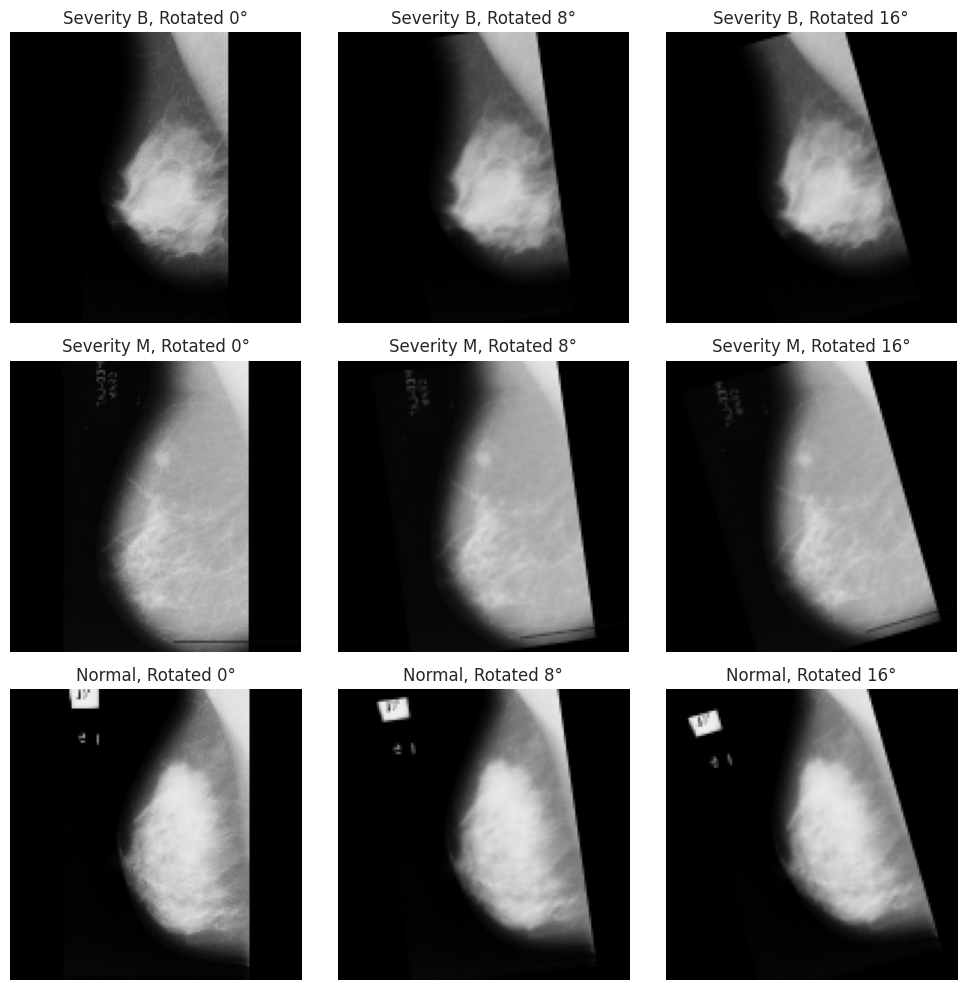

In [ ]:
import matplotlib.pyplot as plt

# Filter images based on severity after augmentation (assuming image_info and lable_info are updated)
b_images_augmented = []
m_images_augmented = []
o_images_augmented = []

for id in ids:
    if id in image_info and id in lable_info:
        label = lable_info[id].get(0, None)
        if label == 1:  # Benign
            for angle, img in image_info[id].items():
                b_images_augmented.append((img, angle))
        elif label == 2:  # Malignant
            for angle, img in image_info[id].items():
                m_images_augmented.append((img, angle))
        elif label == 0:  # Normal
            for angle, img in image_info[id].items():
                o_images_augmented.append((img, angle))

# Display images in a 3x3 grid for each severity
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

# Benign images
for i in range(min(3, len(b_images_augmented))):
    img, angle = b_images_augmented[i]
    axes[0, i].imshow(img, cmap='gray')
    axes[0, i].set_title(f'Severity B, Rotated {angle}°')
    axes[0, i].axis('off')

# Malignant images
for i in range(min(3, len(m_images_augmented))):
    img, angle = m_images_augmented[i]
    axes[1, i].imshow(img, cmap='gray')
    axes[1, i].set_title(f'Severity M, Rotated {angle}°')
    axes[1, i].axis('off')

# Normal images
for i in range(min(3, len(o_images_augmented))):
    img, angle = o_images_augmented[i]
    axes[2, i].imshow(img, cmap='gray')
    axes[2, i].set_title(f'Normal, Rotated {angle}°')
    axes[2, i].axis('off')

# Hide any unused subplots
for j in range(len(b_images_augmented), 3):
    axes[0, j].axis('off')
for j in range(len(m_images_augmented), 3):
    axes[1, j].axis('off')
for j in range(len(o_images_augmented), 3):
    axes[2, j].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
#Callbacks
c2 = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=6,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

c3 = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.1,
    patience=6,
    mode="auto",
    min_delta=0.0001,
    cooldown=0,
    min_lr=0.001
)
nClasses=3

Densenet 201

In [ ]:
from tensorflow.keras.applications import DenseNet201  # Import DenseNet201 model

# Initialize DenseNet201 model
base_Neural_Net = DenseNet201(input_shape=(128, 128, 3), weights='imagenet', include_top=False)

# Define the rest of your model
model = Sequential()
model.add(base_Neural_Net)
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(256, kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

# Freeze layers of the base DenseNet201 model
for layer in base_Neural_Net.layers:
    layer.trainable = False


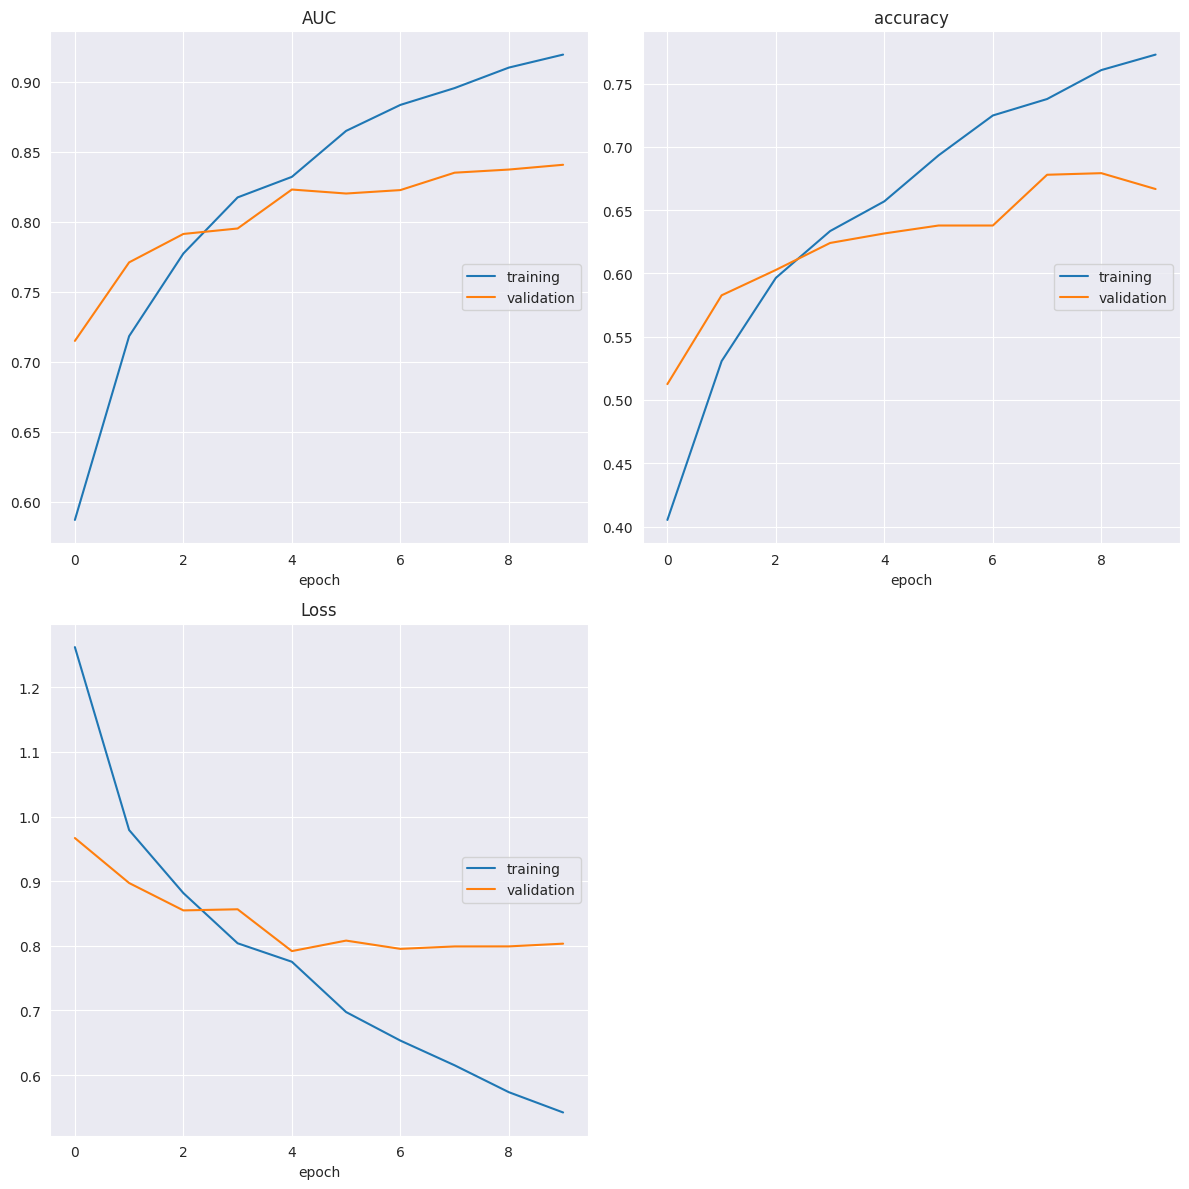

AUC
	training         	 (min:    0.587, max:    0.919, cur:    0.919)
	validation       	 (min:    0.715, max:    0.841, cur:    0.841)
accuracy
	training         	 (min:    0.405, max:    0.773, cur:    0.773)
	validation       	 (min:    0.513, max:    0.679, cur:    0.667)
Loss
	training         	 (min:    0.542, max:    1.262, cur:    0.542)
	validation       	 (min:    0.792, max:    0.967, cur:    0.803)
399/399 ━━━━━━━━━━━━━━━━━━━━ 682s 2s/step - AUC: 0.9264 - accuracy: 0.7895 - loss: 0.5204 - val_AUC: 0.8406 - val_accuracy: 0.6667 - val_loss: 0.8034 - learning_rate: 0.0010


In [ ]:
# Compile the model
from tensorflow.keras.optimizers import Adam

c1 = PlotLossesKeras()
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy', 'AUC'])

# Train the model
model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val),callbacks=[c1, c3], batch_size=16)

In [ ]:
y_pred = model.predict(x_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 85s 3s/step


In [ ]:
print("Performance Report:")
y_pred_proba = model.predict(x_test)
y_pred9 = np.argmax(y_pred_proba, axis=1)
y_test9 = np.argmax(y_test, axis=1)  # Assuming y_test is one-hot encoded
target=["0", "B", "M"]

from sklearn import metrics
from sklearn.metrics import confusion_matrix
print('Accuracy score is:', np.round(metrics.accuracy_score(y_test9, y_pred9), 4))
print('Precision score is:', np.round(metrics.precision_score(y_test9, y_pred9, average='weighted'), 4))
print('Recall score is:', np.round(metrics.recall_score(y_test9, y_pred9, average='weighted'), 4))
print('F1 Score is:', np.round(metrics.f1_score(y_test9, y_pred9, average='weighted'), 4))
# ROC AUC score for multi-class classification needs different handling, check the documentation for the correct usage
print('ROC AUC Score is:', np.round(metrics.roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='weighted'), 4))
print('\t\tClassification Report:\n', metrics.classification_report(y_test9, y_pred9, target_names=target))
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test9, y_pred9)

# Calculate Sensitivity and Specificity for each class
sensitivity = conf_matrix.diagonal() / conf_matrix.sum(axis=1)
specificity = (conf_matrix.sum(axis=1) - conf_matrix.diagonal()) / (conf_matrix.sum(axis=1) + conf_matrix.sum(axis=0) - conf_matrix.diagonal())

# Print Sensitivity and Specificity
for i, label in enumerate(target):
    print(f'Class {label} - Sensitivity: {np.round(sensitivity[i], 4)}, Specificity: {np.round(specificity[i], 4)}')



Performance Report:
25/25 ━━━━━━━━━━━━━━━━━━━━ 64s 3s/step
Accuracy score is: 0.6934
Precision score is: 0.7039
Recall score is: 0.6934
F1 Score is: 0.6923
ROC AUC Score is: 0.8675
		Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.80      0.74       269
           B       0.77      0.60      0.68       315
           M       0.61      0.70      0.65       215

    accuracy                           0.69       799
   macro avg       0.69      0.70      0.69       799
weighted avg       0.70      0.69      0.69       799

Class 0 - Sensitivity: 0.7955, Specificity: 0.1519
Class B - Sensitivity: 0.6, Specificity: 0.3405
Class M - Sensitivity: 0.7023, Specificity: 0.2051


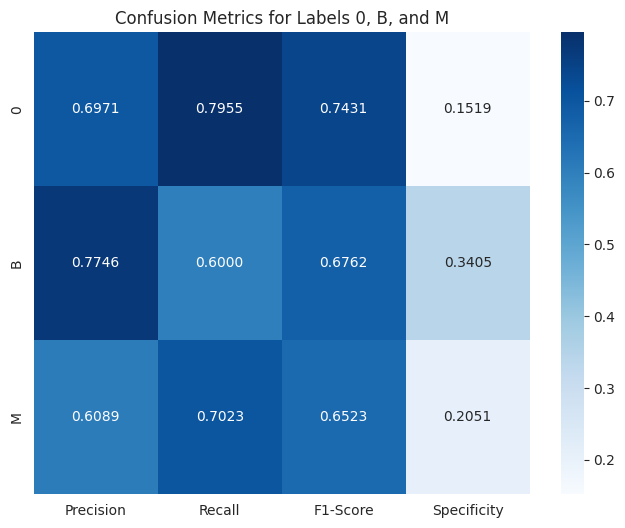

In [ ]:

# Extract values from classification report
report = metrics.classification_report(y_test9, y_pred9, target_names=target, output_dict=True)

# Assuming you have calculated specificity as shown in the previous code
specificity = np.array([
    specificity[0],
    specificity[1],
    specificity[2]
])

# Create confusion matrix
conf_matrix = np.array([
    [report['0']['precision'], report['0']['recall'], report['0']['f1-score'], specificity[0]],
    [report['B']['precision'], report['B']['recall'], report['B']['f1-score'], specificity[1]],
    [report['M']['precision'], report['M']['recall'], report['M']['f1-score'], specificity[2]]
])

# Display confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt=".4f", cmap="Blues", xticklabels=['Precision', 'Recall', 'F1-Score', 'Specificity'], yticklabels=target)
plt.title("Confusion Metrics for Labels 0, B, and M")
plt.show()

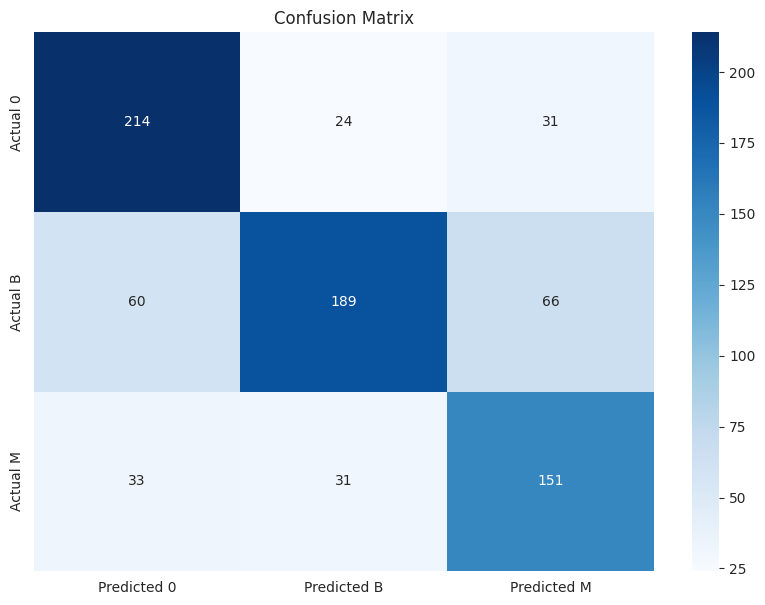

In [ ]:
# prompt: confusion matrix prediction and actual

# Assuming y_test9 and y_pred9 are defined as in the previous code

# Generate confusion matrix
cm = confusion_matrix(y_test9, y_pred9)

# Display the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted B', 'Predicted M'],
            yticklabels=['Actual 0', 'Actual B', 'Actual M'])
plt.title("Confusion Matrix")
plt.show()
